In [1]:
import pandas as pd

file_path = 'Lab Session Data.xlsx'

purchase_data = pd.read_excel(file_path, sheet_name='Purchase data')

matrix_A = purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]

matrix_C = purchase_data[['Payment (Rs)']]

print("Matrix A:")
print(matrix_A.head())

print("\nMatrix C:")
print(matrix_C.head())


Matrix A:
   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2

Matrix C:
   Payment (Rs)
0           386
1           289
2           393
3           110
4           280


In [2]:
import numpy as np

dimensionality = matrix_A.shape[1]
num_vectors = matrix_A.shape[0]
rank_A = np.linalg.matrix_rank(matrix_A)
pseudo_inverse_A = np.linalg.pinv(matrix_A)
product_costs = np.dot(pseudo_inverse_A, matrix_C)

print(f"Dimensionality of the vector space: {dimensionality}")
print(f"Number of vectors in the vector space: {num_vectors}")
print(f"Rank of Matrix A: {rank_A}")
print(f"Cost of each product (Candies, Mangoes, Milk Packets): \n{product_costs}")

Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each product (Candies, Mangoes, Milk Packets): 
[[ 1.]
 [55.]
 [18.]]


In [5]:
import pandas as pd
import numpy as nm


data=pd.read_excel('Lab Session Data.xlsx', sheet_name='Purchase data')
data['status'] = data['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR")
print(data[['Payment (Rs)', 'status']].head())


   Payment (Rs) status
0           386   RICH
1           289   RICH
2           393   RICH
3           110   POOR
4           280   RICH


The mean of price is 1560.663453815261
The variance in price is 58732.365352539186
The mean price on Wednesdays is 1550.706
The difference between the mean price usually and mean price on Wednesdays is 9.957453815261033
The mean price in April is 1698.9526315789474
The difference between the mean price usually and mean price in April is -138.28917776368644
Probability of making a profit on Wednesday: 0.42
The probability of profit given it is Wednesday is 0.08433734939759036
The probability of making a loss over the stock is 0.4979919678714859


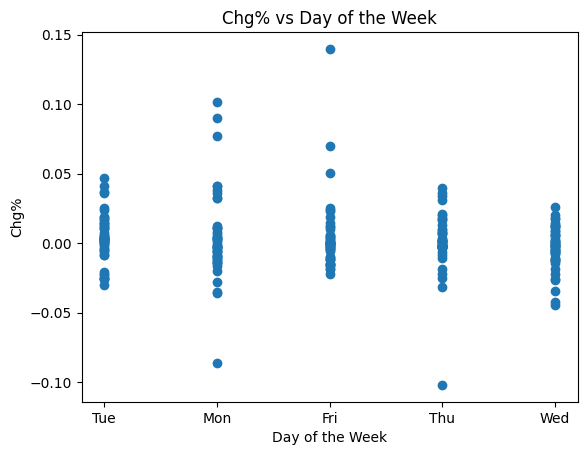

In [10]:
import statistics
import pandas as pd
import matplotlib.pyplot as plot

# Load the data
data = pd.read_excel('Lab Session Data.xlsx', sheet_name='IRCTC Stock Price')

# Extracting price data
pricedata = data['Price']

# 1. Mean and variance of the price
daily_mean = statistics.mean(pricedata)
print("The mean of price is", daily_mean)
print("The variance in price is", statistics.variance(pricedata))

# 2. Mean price on Wednesdays
wed_data = data[data['Day'] == 'Wed']
mean_wed = statistics.mean(wed_data['Price'])
print("The mean price on Wednesdays is", mean_wed)
print("The difference between the mean price usually and mean price on Wednesdays is", daily_mean - mean_wed)

# 3. Mean price in April
apr_data = data[data['Month'] == 'Apr']
mean_apr = statistics.mean(apr_data['Price'])
print("The mean price in April is", mean_apr)
print("The difference between the mean price usually and mean price in April is", daily_mean - mean_apr)

# 4. Probability of making a profit on Wednesday
prob_profit_wednesday = len(wed_data[wed_data['Chg%'] > 0]) / len(wed_data)
print("Probability of making a profit on Wednesday:", prob_profit_wednesday)

# Conditional probability: Probability of making a profit given it's Wednesday
inv_denom = (len(wed_data) / len(data))
conditional_prob = prob_profit_wednesday * inv_denom
print("The probability of profit given it is Wednesday is", conditional_prob)

# 5. Probability of making a loss over the stock (negative Chg%)
prob_loss = len(list(filter(lambda x: x < 0, data['Chg%']))) / len(data)
print("The probability of making a loss over the stock is", prob_loss)

# 6. Scatter plot of Chg% vs Day of the Week
plot.scatter(data['Day'], data['Chg%'])
plot.xlabel('Day of the Week')
plot.ylabel('Chg%')
plot.title('Chg% vs Day of the Week')
plot.show()


In [11]:
import pandas as pd
# Load the dataset
data = pd.read_excel('Lab Session Data.xlsx', sheet_name='thyroid0387_UCI')


# Convert columns with '?' to NaN for proper numeric calculations
data.replace('?', pd.NA, inplace=True)

# Convert appropriate columns to numeric
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

data.info()

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Calculate range, mean, and standard deviation for numeric columns
numeric_stats = data[numeric_columns].agg(['min', 'max', 'mean', 'std'])
print(numeric_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record ID                  9172 non-null   int64  
 1   age                        9172 non-null   int64  
 2   sex                        8865 non-null   object 
 3   on thyroxine               9172 non-null   object 
 4   query on thyroxine         9172 non-null   object 
 5   on antithyroid medication  9172 non-null   object 
 6   sick                       9172 non-null   object 
 7   pregnant                   9172 non-null   object 
 8   thyroid surgery            9172 non-null   object 
 9   I131 treatment             9172 non-null   object 
 10  query hypothyroid          9172 non-null   object 
 11  query hyperthyroid         9172 non-null   object 
 12  lithium                    9172 non-null   object 
 13  goitre                     9172 non-null   objec

In [12]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print(outliers)



# Convert '?' to NaN for proper imputation
data.replace('?', pd.NA, inplace=True)

# Convert appropriate columns to numeric
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Impute numeric attributes using the median for 'age' due to outliers
data['age'] = data['age'].fillna(data['age'].median())

# For other numeric attributes, use mean for imputation if no outliers are present
for col in numeric_columns:
    if data[col].isnull().sum() > 0:
        if ((data[col] < (data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)))) |
            (data[col] > (data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))))).any():
            data[col] = data[col].fillna(data[col].median())
        else:
            data[col] = data[col].fillna(data[col].mean())

# Impute categorical attributes using mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check the results
data.info(), data.head()

age      4
TSH    884
T3     360
TT4    422
T4U    420
FTI    501
TBG     29
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record ID                  9172 non-null   int64  
 1   age                        9172 non-null   int64  
 2   sex                        9172 non-null   object 
 3   on thyroxine               9172 non-null   object 
 4   query on thyroxine         9172 non-null   object 
 5   on antithyroid medication  9172 non-null   object 
 6   sick                       9172 non-null   object 
 7   pregnant                   9172 non-null   object 
 8   thyroid surgery            9172 non-null   object 
 9   I131 treatment             9172 non-null   object 
 10  query hypothyroid          9172 non-null   object 
 11  query hyperthyroid         9172 non-null   object 
 12  lithium       

(None,
    Record ID  age sex on thyroxine query on thyroxine  \
 0  840801013   29   F            f                  f   
 1  840801014   29   F            f                  f   
 2  840801042   41   F            f                  f   
 3  840803046   36   F            f                  f   
 4  840803047   32   F            f                  f   
 
   on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
 0                         f    f        f               f              f  ...   
 1                         f    f        f               f              f  ...   
 2                         f    f        f               f              f  ...   
 3                         f    f        f               f              f  ...   
 4                         f    f        f               f              f  ...   
 
   TT4 measured    TT4 T4U measured   T4U FTI measured    FTI TBG measured  \
 0            f  104.0            f  0.96            f  109.0          

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert appropriate columns to numeric
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Impute missing values as per previous steps
data['age'] = data['age'].fillna(data['age'].median())
for col in numeric_columns:
    if data[col].isnull().sum() > 0:
        if ((data[col] < (data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)))) |
            (data[col] > (data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))))).any():
            data[col] = data[col].fillna(data[col].median())
        else:
            data[col] = data[col].fillna(data[col].mean())

# Normalize the numeric attributes using MinMax Scaling
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Check the results
print(data[numeric_columns].head())

        age       TSH        T3       TT4       T4U       FTI       TBG
0  0.000427  0.000557  0.103064  0.170569  0.365741  0.122328  0.129565
1  0.000427  0.003009  0.103064  0.210702  0.365741  0.122328  0.129565
2  0.000610  0.002632  0.103064  0.170569  0.365741  0.122328  0.054527
3  0.000534  0.002632  0.103064  0.170569  0.365741  0.122328  0.129565
4  0.000473  0.002632  0.103064  0.170569  0.365741  0.122328  0.179590


In [15]:
# Convert '?' to NaN for proper imputation
data.replace('?', pd.NA, inplace=True)

# Impute missing values for categorical attributes using mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Extract the first two observation vectors
vector1 = data.iloc[0]
vector2 = data.iloc[1]

# Identify binary attributes (assuming 'f' and 't' are binary values in the dataset)
binary_attributes = vector1[vector1.isin(['f', 't'])].index

# Convert binary values to 0 and 1
vector1_binary = vector1[binary_attributes].replace({'f': 0, 't': 1}).astype(int).infer_objects(copy=False)
vector2_binary = vector2[binary_attributes].replace({'f': 0, 't': 1}).astype(int).infer_objects(copy=False)

# Calculate f11, f00, f01, f10
f11 = ((vector1_binary == 1) & (vector2_binary == 1)).sum()
f00 = ((vector1_binary == 0) & (vector2_binary == 0)).sum()
f01 = ((vector1_binary == 0) & (vector2_binary == 1)).sum()
f10 = ((vector1_binary == 1) & (vector2_binary == 0)).sum()

# Calculate JC and SMC
JC = f11 / (f01 + f10 + f11)
SMC = (f11 + f00) / (f00 + f01 + f10 + f11)

print(JC)
print(SMC)

0.25
0.85


C:\Users\hyndh\AppData\Local\Temp\ipykernel_10988\2215094754.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vector1_binary = vector1[binary_attributes].replace({'f': 0, 't': 1}).astype(int).infer_objects(copy=False)
C:\Users\hyndh\AppData\Local\Temp\ipykernel_10988\2215094754.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vector2_binary = vector2[binary_attributes].replace({'f': 0, 't': 1}).astype(int).infer_objects(copy=False)


In [16]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Extract the complete vectors for the first two observations
vector1 = numeric_data.iloc[0].fillna(0).values
vector2 = numeric_data.iloc[1].fillna(0).values

# Calculate Cosine similarity
cosine_sim = cosine_similarity([vector1], [vector2])[0][0]

# Display the result
print("Cosine Similarity:", cosine_sim)


Cosine Similarity: 1.0


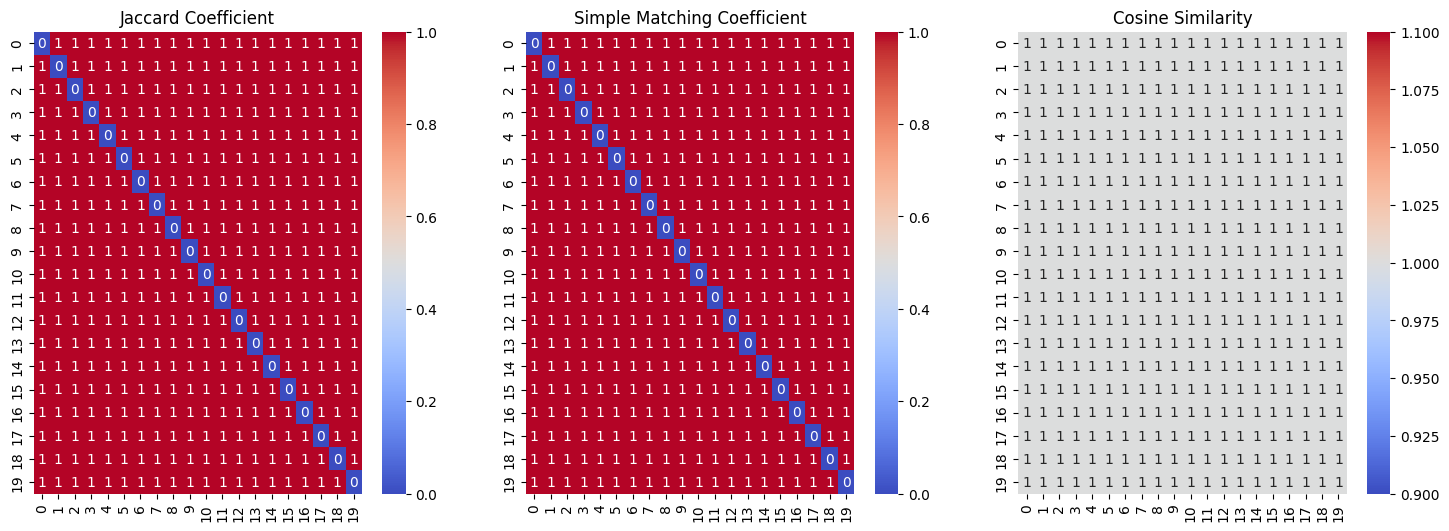

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=[np.number]).iloc[:20]

# Function to compute Jaccard Coefficient
def jaccard_coefficient(v1, v2):
    v1_bin = (v1 != 0).astype(int)
    v2_bin = (v2 != 0).astype(int)
    f11 = np.sum((v1_bin == 1) & (v2_bin == 1))
    f01 = np.sum((v1_bin == 0) & (v2_bin == 1))
    f10 = np.sum((v1_bin == 1) & (v2_bin == 0))
    return f11 / (f01 + f10 + f11)

# Function to compute Simple Matching Coefficient
def simple_matching_coefficient(v1, v2):
    v1_bin = (v1 != 0).astype(int)
    v2_bin = (v2 != 0).astype(int)
    f11 = np.sum((v1_bin == 1) & (v2_bin == 1))
    f00 = np.sum((v1_bin == 0) & (v2_bin == 0))
    f01 = np.sum((v1_bin == 0) & (v2_bin == 1))
    f10 = np.sum((v1_bin == 1) & (v2_bin == 0))
    return (f11 + f00) / (f00 + f01 + f10 + f11)

# Calculate JC, SMC, and COS for the first 20 vectors
n = len(numeric_data)
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cos_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            jc_matrix[i, j] = jaccard_coefficient(numeric_data.iloc[i].values, numeric_data.iloc[j].values)
            smc_matrix[i, j] = simple_matching_coefficient(numeric_data.iloc[i].values, numeric_data.iloc[j].values)
        cos_matrix[i, j] = cosine_similarity([numeric_data.iloc[i].values], [numeric_data.iloc[j].values])[0][0]

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(jc_matrix, annot=True, ax=axes[0], cmap="coolwarm")
axes[0].set_title('Jaccard Coefficient')

sns.heatmap(smc_matrix, annot=True, ax=axes[1], cmap="coolwarm")
axes[1].set_title('Simple Matching Coefficient')

sns.heatmap(cos_matrix, annot=True, ax=axes[2], cmap="coolwarm")
axes[2].set_title('Cosine Similarity')

plt.show()